https://www.zhihu.com/question/342999974/answer/804989903

https://baijiahao.baidu.com/s?id=1678971943935772787&wfr=spider&for=pc

https://baijiahao.baidu.com/s?id=1655144400361023597&wfr=spider&for=pc

https://blog.csdn.net/mrjkzhangma/article/details/100128649

https://cloud.tencent.com/developer/article/1143253

https://blog.csdn.net/han_xiaoyang/article/details/49797143 (Github)

# 理解任务

# 理解数据

## 查看空值

## corr 矩阵

In [ ]:
sns.heatmap(df.corr())

## 变量之间的分布distribution

可以取log(a)

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


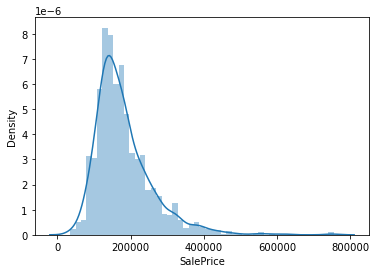

In [9]:
# Our SalesPrice is skewed right (check plot below). I'm logtransforming it. 
ax = sns.distplot(train_labels)

In [10]:
## Log transformation of labels
train_labels = np.log(train_labels)

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


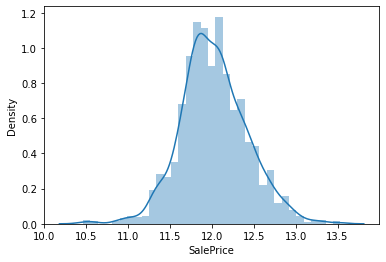

In [11]:
## Now it looks much better
ax = sns.distplot(train_labels)

# 数据处理

## get_dummies

In [42]:
# Create a new variable for every unique value of Embarked
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


## fill_na

pd.get_dummies

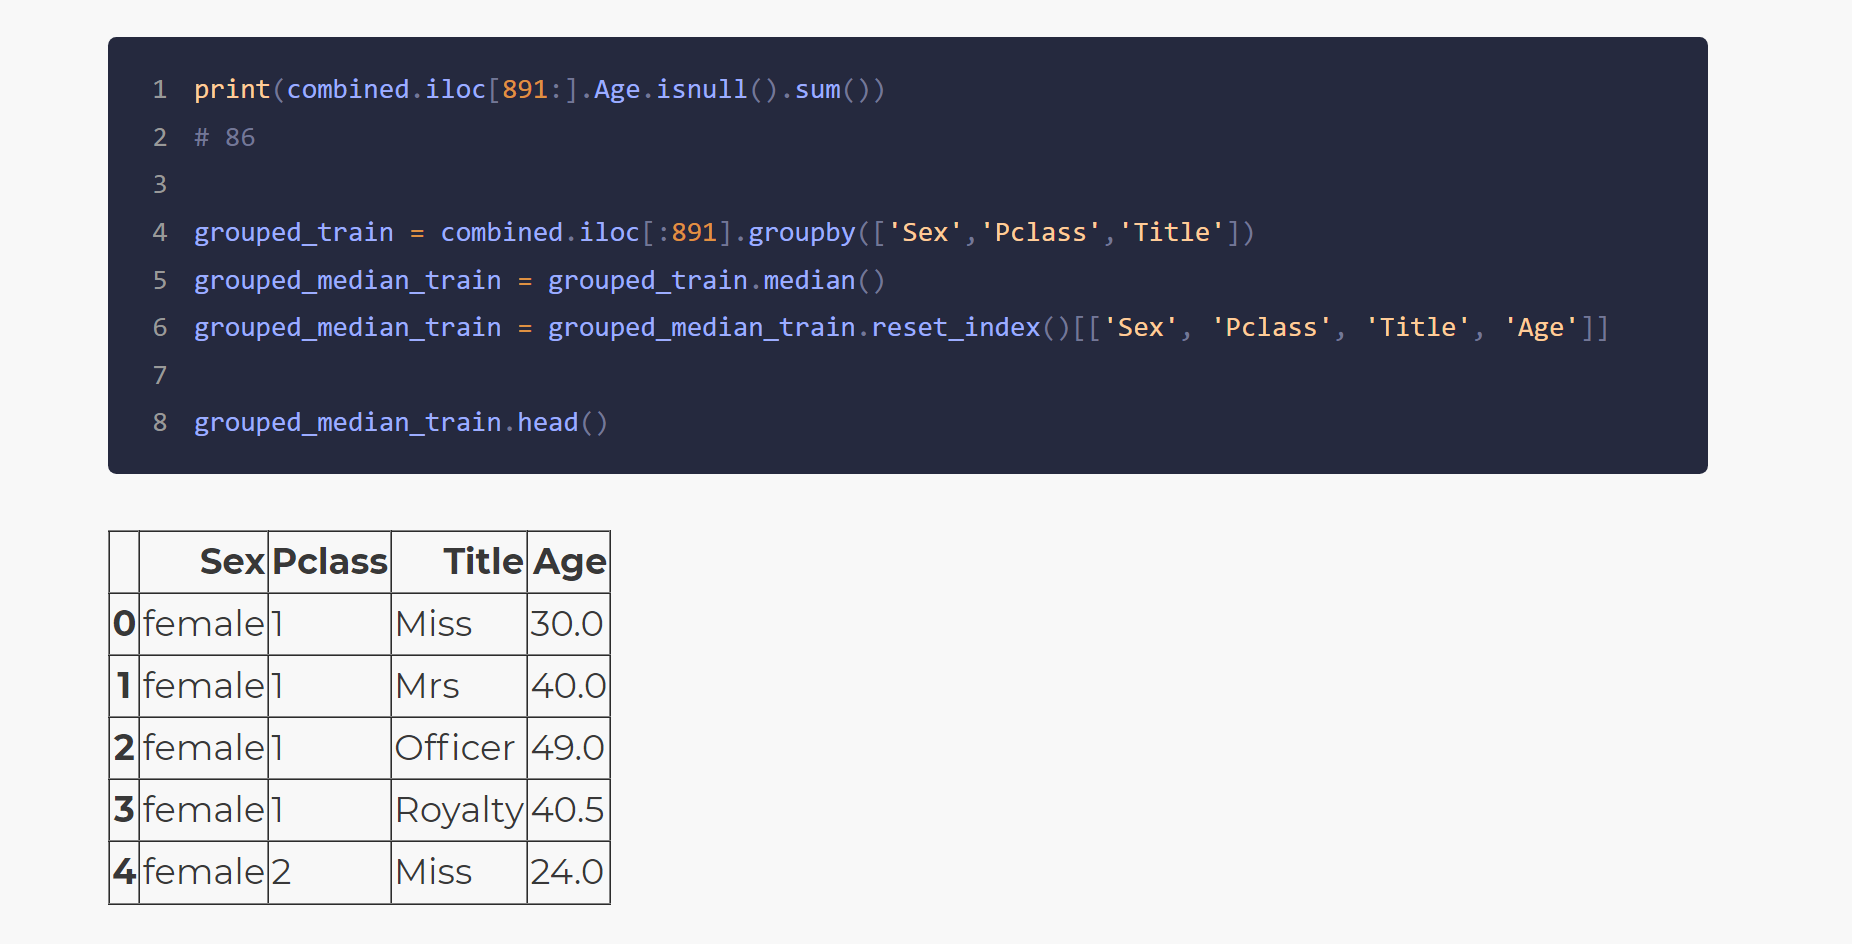

填充的时候可以分段填充

## 标准化

## 字段处理，get_dummies 分类

## 找到重要性参数

排序函数

In [ ]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

## 学习曲线

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    print(train_sizes.shape)
    print(train_scores.shape)
    print(test_scores.shape)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title,font='Microsoft YaHei')
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数",font='Microsoft YaHei')
        plt.ylabel(u"得分",font='Microsoft YaHei')
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best",prop = legend_font)
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线",X, y)

# 划分数据集/交叉验证

In [65]:
from sklearn.model_selection import cross_val_score,train_test_split

In [2]:
from sklearn.model_selection import KFold , StratifiedKFold

In [3]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

In [5]:
kfolds = KFold(n_splits=5, shuffle=False)

for (trn_idx, val_idx) in kfolds.split(X, y):
    print((trn_idx, val_idx))
    print((len(trn_idx), len(val_idx)))  

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
(40, 10)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]), array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
(40, 10)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]), array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))
(40, 10)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]), array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]))
(40, 10)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8

In [23]:
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skfolds = StratifiedKFold(n_splits=2, shuffle=False)

for train_index, test_index in skfolds.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


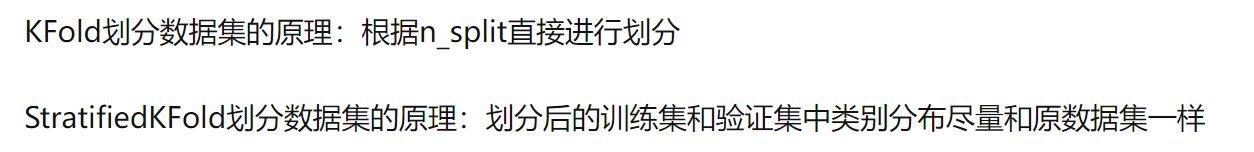

# 数据预处理

新版本所有的预处理都需要是二维数据，对于df[columns]可以改成df[columns].values.reshape(-1,1)

In [64]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))

# 调参/选择特征

## GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

scores = ['accuracy', 'f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(DTC(), tuned_parameters, cv=5, # 这里可以改成 cv=cross_validation=StratifiedKFold(n_splits=5)
                       scoring= score)
    # (模型，调参的数据(格式为字典/列表)，k折验证，score的评分方式)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

NameError: name 'model' is not defined

## RFECV

In [63]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)
print(sum(selector.ranking_ != 1))

[ True  True  True  True  True False False False False False]
[1 1 1 1 1 6 4 3 2 5]
5


逐渐消除权重低的特征值

## SelectFromModel

In [66]:
from sklearn.feature_selection import SelectFromModel

In [68]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
X = [[ 0.87, -1.34,  0.31 ],
     [-2.79, -0.02, -0.85 ],
     [-1.34, -0.48, -2.55 ],
     [ 1.92,  1.48,  0.65 ]]
y = [0, 1, 0, 1]
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
print(selector.estimator_.coef_)
print(selector.threshold_)
print(selector.get_support())
print(selector.transform(X))

[[-0.3252302   0.83462377  0.49750423]]
0.5524527319086915
[False  True False]
[[-1.34]
 [-0.02]
 [-0.48]
 [ 1.48]]


## 线性模型使用 ElasticNetCV

In [70]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train_st, y_train_st)

NameError: name 'linear_model' is not defined

# 衡量模型

## accuracy

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

NameError: name 'y_true' is not defined